In [2]:
import sys
sys.path.append('C:/Users/Gabriel/GitHub/bloqueios')

import newBlock as nb
import cartopy
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import metpy.calc as mpcalc
import json
import calendar
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

import matplotlib.ticker as mticker
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from netCDF4 import num2date
import matplotlib.pyplot as plt
import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
nb.lammoc_dataset

In [3]:
dataset2 = nb.dataset('D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/Climatologias/nc/msl_70_20_largeCut.nc', 'ERA-5')
dados2 = (dataset2.formatar(lon=[-65,20], lat=[-10,-50], time=["1979-12-01", "2018-11-01"], opr="divisão", fator=100)).dataset

In [4]:
data_season = dados2.sel(time=slice("1979-12-01", "2018-11-01")).groupby('time.season').mean()

In [5]:
data_season

<xarray.Dataset>
Dimensions:  (lat: 161, lon: 341, season: 4)
Coordinates:
  * lon      (lon) float32 -65.0 -64.75 -64.5 -64.25 ... 19.25 19.5 19.75 20.0
  * lat      (lat) float32 -10.0 -10.25 -10.5 -10.75 ... -49.5 -49.75 -50.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    msl      (season, lat, lon) float32 1009.91547 1010.0173 ... 1003.6838

In [6]:
data = data_season.where(data_season.msl>=1017.99)

In [7]:
dataDJF = data.sel(season='DJF').dropna(dim='lon',how='all').dropna(dim='lat',how='all')
dataJJA = data.sel(season='JJA').dropna(dim='lon',how='all').dropna(dim='lat',how='all')
dataMAM = data.sel(season='MAM').dropna(dim='lon',how='all').dropna(dim='lat',how='all')
dataSON = data.sel(season='SON').dropna(dim='lon',how='all').dropna(dim='lat',how='all')

In [8]:
DJF_coords_min = [dataDJF.msl.lon.values.min(), dataDJF.msl.lat.values.min()]
DJF_coords_max = [dataDJF.msl.lon.values.max(), dataDJF.msl.lat.values.max()]

JJA_coords_min = [dataJJA.msl.lon.values.min(), dataJJA.msl.lat.values.min()]
JJA_coords_max = [dataJJA.msl.lon.values.max(), dataJJA.msl.lat.values.max()]

MAM_coords_min = [dataMAM.msl.lon.values.min(), dataMAM.msl.lat.values.min()]
MAM_coords_max = [dataMAM.msl.lon.values.max(), dataMAM.msl.lat.values.max()]

SON_coords_min = [dataSON.msl.lon.values.min(), dataSON.msl.lat.values.min()]
SON_coords_max = [dataSON.msl.lon.values.max(), dataSON.msl.lat.values.max()]

In [9]:
SON_coords_min

[-40.75, -40.75]

In [10]:
SON_coords_max

[20.0, -16.0]

In [14]:
def figura(data, plot_type='contourf'):#, DJF_coords_min, DJF_coords_max, JJA_coords_min, JJA_coords_max, MAM_coords_min, MAM_coords_max ,SON_coords_min ,SON_coords_max):
    fig, ax = plt.subplots(nrows=2,ncols=2,subplot_kw=dict(projection = ccrs.PlateCarree()), figsize=(32,18))
    plt.subplots_adjust(hspace = 0.15, wspace= 0.05)
    fig.suptitle('Mean Sea Level Pressure by Season',  fontsize=48, weight="medium",style="oblique",va="top", ha="center")				
    
    
    plott(ax[0][0], plot_type, 'DJF', data, DJF_coords_min, DJF_coords_max)
    plott(ax[0][1], plot_type, 'JJA', data, JJA_coords_min, JJA_coords_max)
    plott(ax[1][0], plot_type, 'MAM', data, MAM_coords_min, MAM_coords_max)
    plott(ax[1][1], plot_type, 'SON', data, SON_coords_min ,SON_coords_max)
    

In [12]:
def plott(ax, plot_type, season, data, season_coords_min, season_coords_max):
    
    clevs_ = np.arange(1018,1026,1)
    
    if plot_type == 'contourf':
        cf = ax.contourf(data.lon.values, data.lat.values, data.msl.sel(season=season), clevs_, extend='both')
        cbar = plt.colorbar(cf, orientation='horizontal', pad=0.10 , ax=ax, shrink = 0.85, aspect=40)
        cbar.ax.tick_params(labelsize=20)
        #cbar.set_label("W / m²", fontsize = 17, y = 0.3)
    
    elif plot_type == 'contour':
        cf = ax.contour(data.lon.values, data.lat.values, data.msl.sel(season=season), clevs_, colors='k' )
        ax.clabel(cf, inline_spacing=7, fontsize= 10, fmt = '%1.0f')

    seasonDATA = data.sel(season=season)
    maxPT = seasonDATA.where(seasonDATA.msl==seasonDATA.msl.max(), drop=True)
    #ax.scatter(maxPT.lon.values, maxPT.lat.values, s=400, transform=ccrs.PlateCarree(), color='orangered', alpha=1, marker='x')
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.3, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.ylines = True
    gl.xlines = True
    #gl.xlocator = mticker.FixedLocator(np.arange(-70, 50, 20)) #-70,50,20
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
    
    ax.coastlines('50m')
    #ax.get_extent
    ax.set_extent([-65, 18, -42, -5])
    ax.set_title('LAMMOC-UFF', fontdict={'fontsize': 17}, loc = 'right', style="oblique")
    ax.set_title(season, fontdict={'fontsize': 30}, loc = 'left', style="oblique")
   
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='gray')
    ax.stock_img()
    
    line = plt.Line2D((season_coords_min[0],season_coords_min[0]), (season_coords_min[1],season_coords_max[1]),linewidth=4, color = 'midnightblue')
    ax.add_line(line)
    line2 = plt.Line2D((season_coords_min[0],season_coords_max[0]), (season_coords_max[1],season_coords_max[1]),linewidth=4, color = 'midnightblue')
    ax.add_line(line2)
    line3 = plt.Line2D((season_coords_max[0],season_coords_max[0]), (season_coords_max[1],season_coords_min[1]),linewidth=4, color = 'midnightblue')
    ax.add_line(line3)
    line4 = plt.Line2D((season_coords_max[0],season_coords_min[0]), (season_coords_min[1],season_coords_min[1]),linewidth=4, color = 'midnightblue')
    ax.add_line(line4)
    


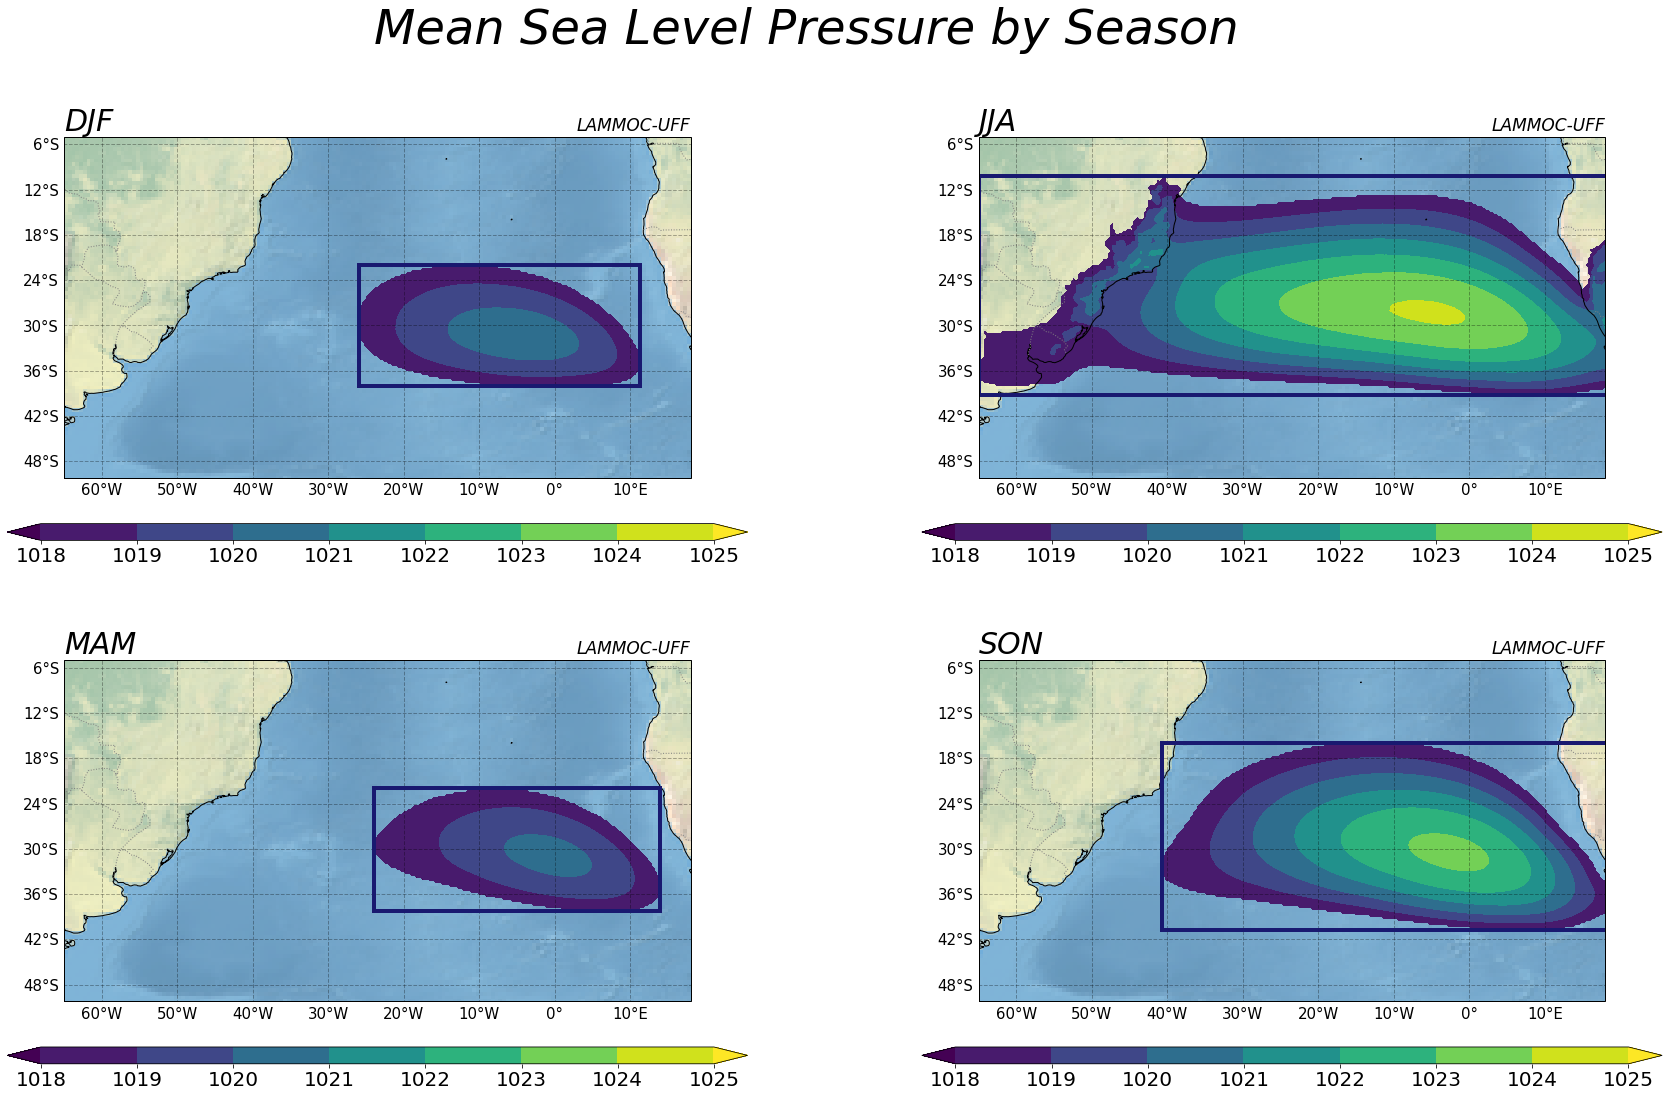

In [15]:
figura(data, plot_type='contourf')
plt.savefig("D:\\_Gabriel\\Estudo\\UFF\\Bloqueios_Atmosfericos\\Apresentações\\MODCLIM\\AREAmsl_2", bbox_inches = 'tight')

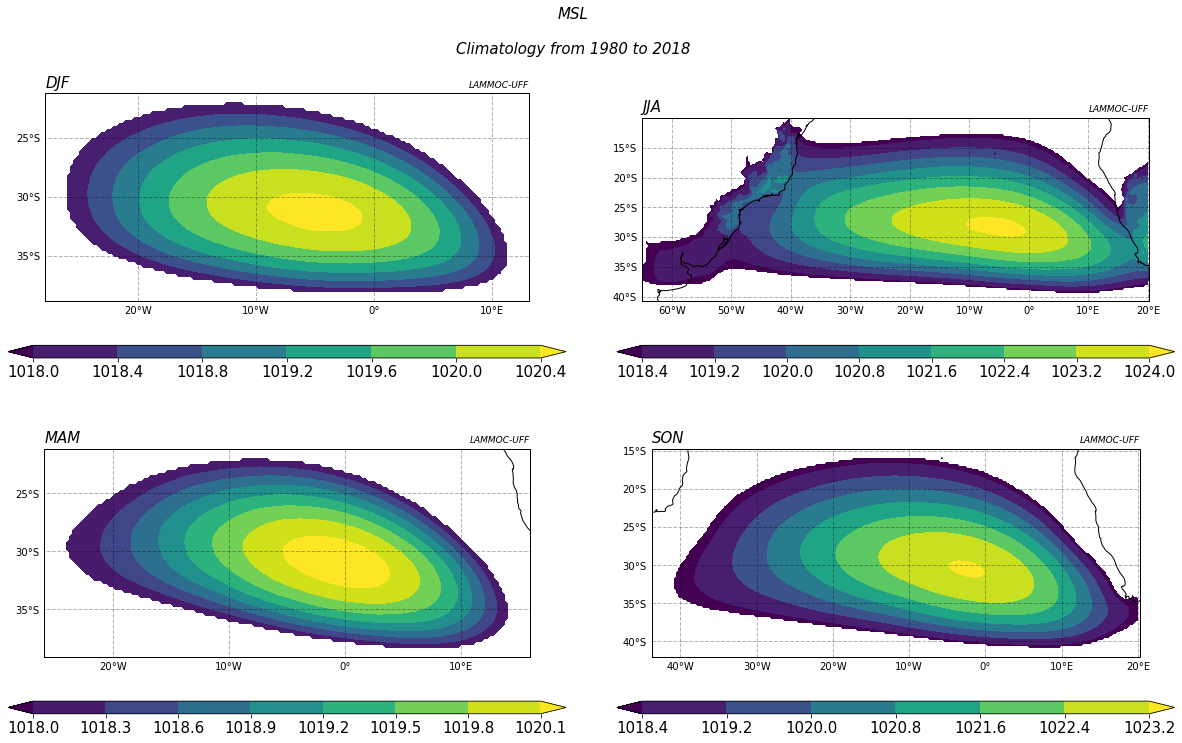

In [50]:
LPseason = nb.lammoc_plot(data, 'ERA-5')

LPseason.seasons(kind='climatologia', periodo = ["1979-12-01", "2018-11-01"])

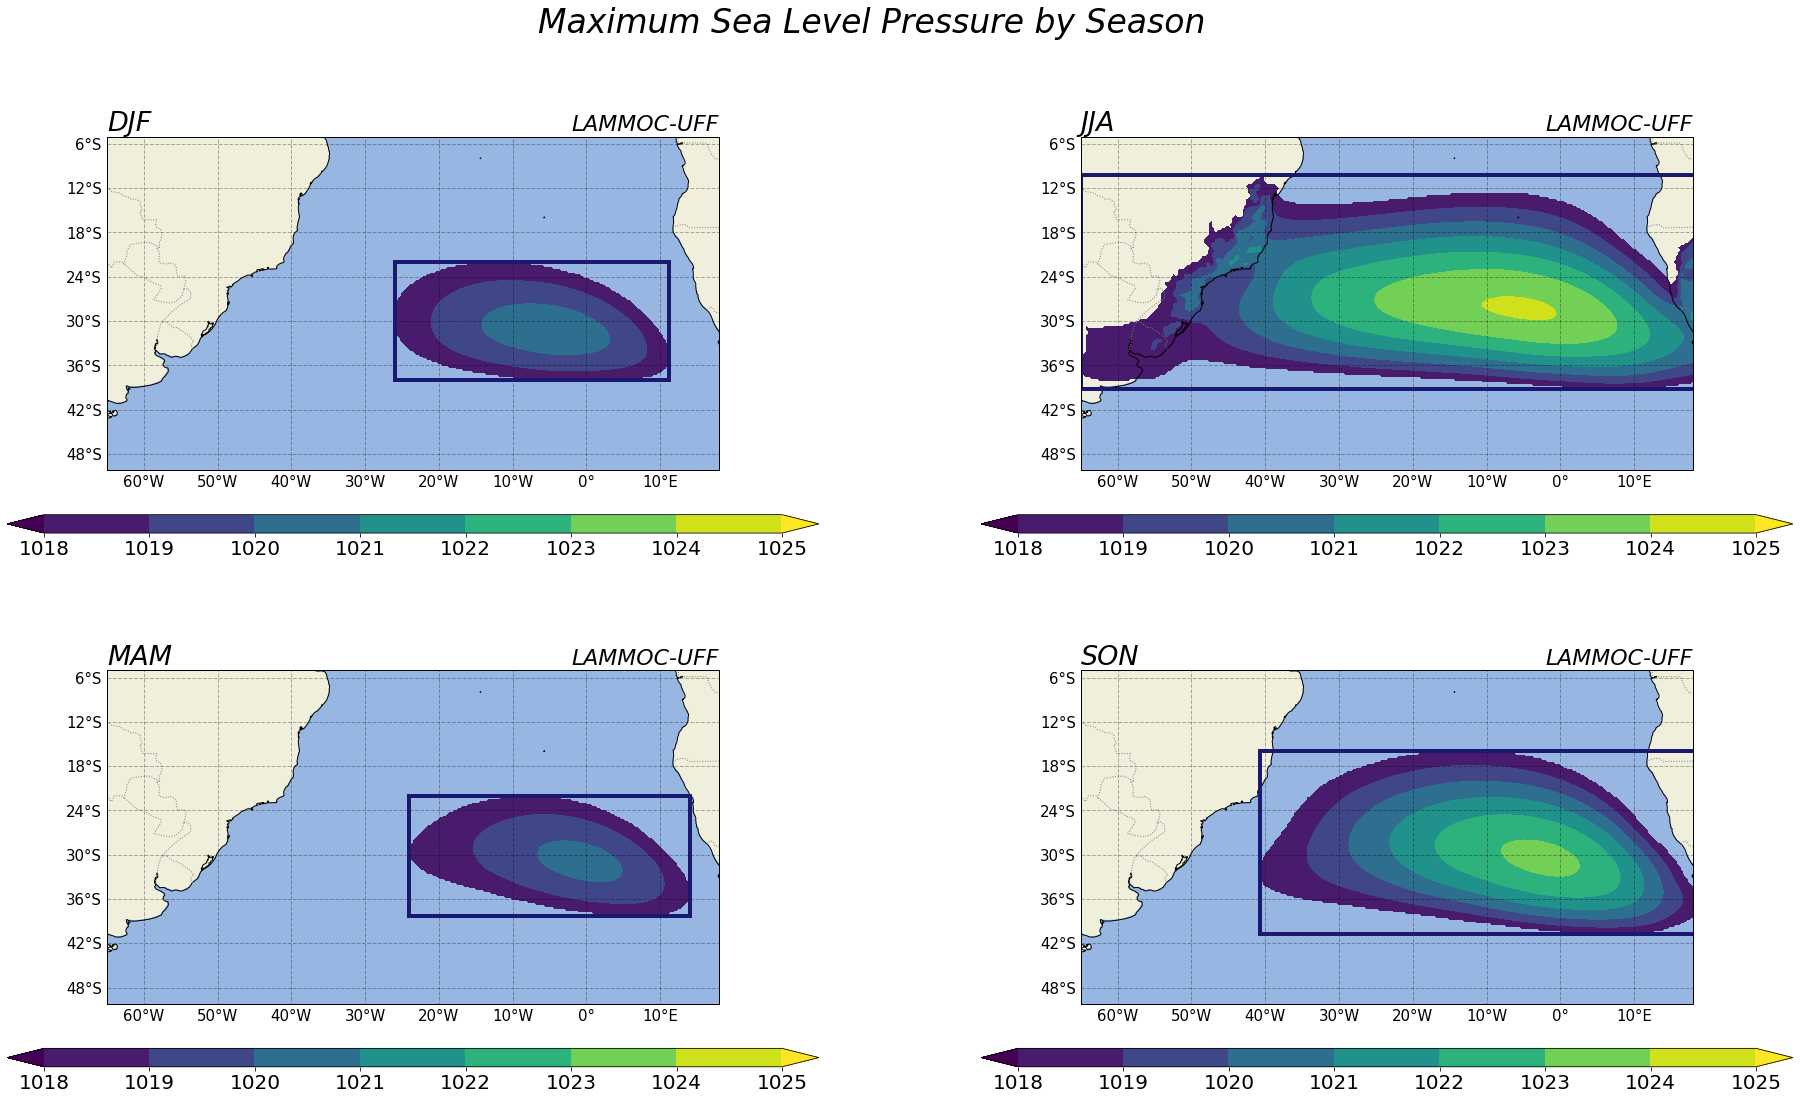